In [2]:
import numpy as np

In [3]:
validation_preds = np.load('evals/vit-tiny-16-224-continent-base/validation_preds.npy', allow_pickle=True)
validation_preds

array({'predictions_label': ['Oceania', 'Africa', 'Africa', 'North America', 'North America', 'Asia', 'North America', 'Oceania', 'Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'North America', 'Asia', 'Africa', 'South America', 'Oceania', 'Europe', 'Europe', 'North America', 'Europe', 'Oceania', 'Oceania', 'South America', 'Europe', 'North America', 'Europe', 'North America', 'North America', 'Oceania', 'Oceania', 'Oceania', 'Europe', 'Africa', 'Europe', 'Oceania', 'Europe', 'South America', 'Oceania', 'Africa', 'South America', 'Africa', 'Europe', 'Oceania', 'Oceania', 'North America', 'South America', 'North America', 'Asia', 'Africa', 'Asia', 'Africa', 'Africa', 'Africa', 'Asia', 'Asia', 'Europe', 'North America', 'Africa', 'Asia', 'Europe', 'South America', 'Oceania', 'Europe', 'Asia', 'Africa', 'North America', 'Africa', 'South America', 'Africa', 'Asia', 'North America', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'South America', 'North America', 'Oc

In [4]:
preds = validation_preds.tolist()["predictions_id"]
len(validation_preds.tolist()["predictions_id"])


16380

In [5]:
from datasets import load_dataset
ds = load_dataset("jrheiner/kerger_1024", "224")
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'continent', 'country', 'altitude', 'compass_angle', 'captured_at', 'camera_type', 'exif_orientation', 'day_night', 'percentage_dark_pixels', 'height', 'width', 'longitude', 'latitude'],
        num_rows: 54600
    })
    test: Dataset({
        features: ['image', 'image_id', 'continent', 'country', 'altitude', 'compass_angle', 'captured_at', 'camera_type', 'exif_orientation', 'day_night', 'percentage_dark_pixels', 'height', 'width', 'longitude', 'latitude'],
        num_rows: 7020
    })
    validation: Dataset({
        features: ['image', 'image_id', 'continent', 'country', 'altitude', 'compass_angle', 'captured_at', 'camera_type', 'exif_orientation', 'day_night', 'percentage_dark_pixels', 'height', 'width', 'longitude', 'latitude'],
        num_rows: 16380
    })
})

In [6]:
ground_truth = ds["validation"]["continent"]
len(ds["validation"]["continent"])

16380

In [7]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

plt.rcParams["axes.axisbelow"] = True
plt.rcParams["axes.grid"] = True

In [8]:
np_preds = np.array(preds)
np_gt = np.array(ground_truth)

In [9]:
subset_accuracies = []
for i in range(1, np_preds.size + 1):
  random_subset_indices = np.random.randint(0,np_preds.size, size=i)
  y_pred_subset = np_preds[random_subset_indices]
  y_true_subset = np_gt[random_subset_indices]
  validation_subset_accuracy = accuracy_score(y_true_subset, y_pred_subset)
  subset_accuracies.append(validation_subset_accuracy)

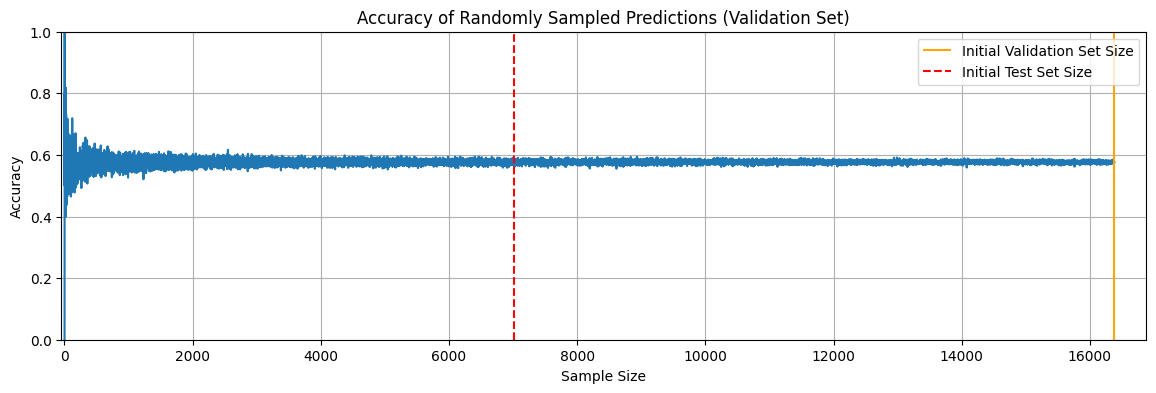

In [10]:
plt.figure(figsize=(14,4))
plt.plot(range(1, np_preds.size + 1), subset_accuracies)
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.vlines(np_preds.size, 0, 1, colors="orange" , linestyles='-', label='Initial Validation Set Size')
plt.vlines(7020, 0, 1, linestyles='--', colors="red", label='Initial Test Set Size')
plt.xlim(-50, np_preds.size+500)
plt.ylim(0, 1)
plt.title('Accuracy of Randomly Sampled Predictions (Validation Set)')
plt.legend()
plt.savefig("figures/validation_set_size_eval.png", dpi=150, bbox_inches='tight')
plt.show()

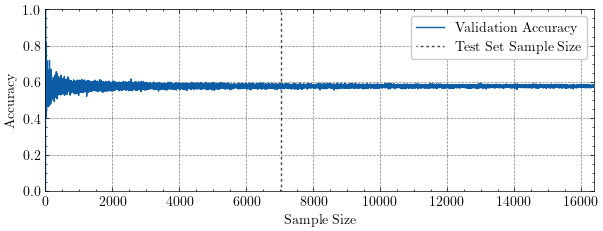

In [19]:
import scienceplots

plt.style.use(['science', 'std-colors', 'grid'])

plt.figure(figsize=(3.54*2,3.54/1.5))
plt.plot(range(1, np_preds.size + 1), subset_accuracies, label='Validation Accuracy')
plt.vlines(7020, 0, 1, linestyles=(1, (2,2)), label='Test Set Sample Size', colors="#474747", zorder=-1)
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
# plt.vlines(np_preds.size, 0, 1, linestyles='-', label='Initial Validation Set Size')
plt.xlim(0, np_preds.size)
plt.ylim(0, 1)
# plt.title('Accuracy of Randomly Sampled Predictions (Validation Set)')
plt.legend()
plt.savefig("figures/validation_set_size_eval.pdf", bbox_inches='tight', dpi=600)
plt.savefig("figures/validation_set_size_eval.png", bbox_inches='tight', dpi=600)
plt.show()

In [12]:
import matplotlib.pyplot as plt

# Get the current style
current_style = plt.rcParams['axes.prop_cycle']

# Extract the colors from the style
colors = [color['color'] for color in current_style]

# Print the colors
print(colors)

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']
